In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("tidymodels")

Installing package into 'C:/Users/My Lan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\My Lan\AppData\Local\Temp\Rtmp6BPgT7\downloaded_packages


Installing package into 'C:/Users/My Lan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\My Lan\AppData\Local\Temp\Rtmp6BPgT7\downloaded_packages


Installing package into 'C:/Users/My Lan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'cli'




package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\My Lan\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll to C:\Users\My Lan\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'tidymodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\My Lan\AppData\Local\Temp\Rtmp6BPgT7\downloaded_packages


In [32]:
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)

Warning message:
"package 'tidymodels' was built under R version 4.4.3"


ERROR: Error: package or namespace load failed for 'tidymodels' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'cli' 3.6.3 is already loaded, but >= 3.6.4 is required


In [33]:
data_combined <- read_excel("REXData23Feb2025_with_CT.xlsx", sheet = "Combined")
head(data_combined)
colnames(data_combined) <- gsub(" ", "_", colnames(data_combined))
data_combined$Group <- as.factor(data_combined$Group)

New names:
• `` -> `...93`
• `` -> `...94`
• `` -> `...95`
• `` -> `...96`
• `` -> `...97`
• `` -> `...98`
• `` -> `...99`
• `` -> `...100`
• `` -> `...101`
• `` -> `...102`
• `` -> `...103`
• `` -> `...104`
• `` -> `...105`


PImID,SubstudyID (All),rbc_shift,inflation,rbc_m_ratio,vent_defect_pct,vent_low_pct,vent_high_pct,rbc_defect_pct,rbc_low_pct,⋯,...96,...97,...98,...99,...100,...101,...102,...103,...104,...105
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
PIm0067,CANUCK1058,218.3458,3.242828,0.495,1.779580,13.762340,15.38288,0.2362108,7.465580,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0327,CANUCK1181,216.2458,3.197052,0.590,2.444612,10.554500,16.71042,0.7435973,6.796422,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0070,CANUCK1034,218.4715,3.356506,0.478,1.011947,11.976979,20.03982,1.7065808,10.205844,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0142,CANUCK1074,219.0143,4.874664,0.590,1.286522,9.113959,19.41865,1.6727915,15.362511,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0184,CANUCK1079,218.3623,3.380524,0.565,1.178085,11.567801,23.99863,1.2331525,11.247326,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0310,CANUCK1152,219.0319,4.803741,0.738,2.100261,14.994695,14.42484,0.4389838,2.130755,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [45]:
data_combined$Group <- factor(data_combined$Group, levels = c(0, 1), labels = c("Control", "Exposure"))

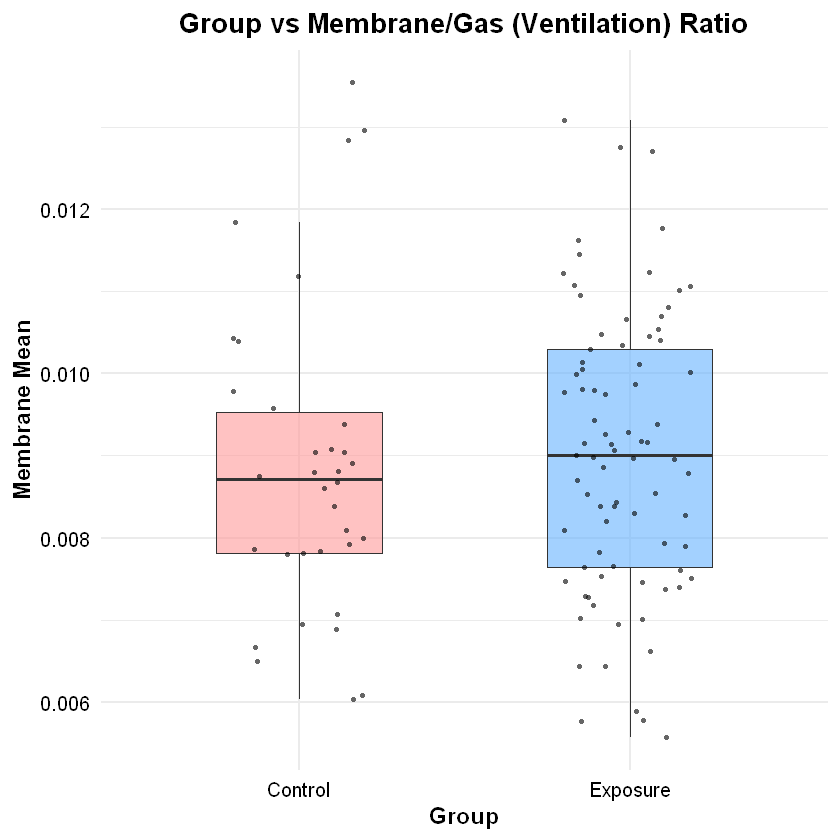

In [46]:
ggplot(data_combined, aes(x = Group, y = membrane_mean)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs Membrane/Gas (Ventilation) Ratio",
       x = "Group",
       y = "Membrane Mean") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none",  
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))

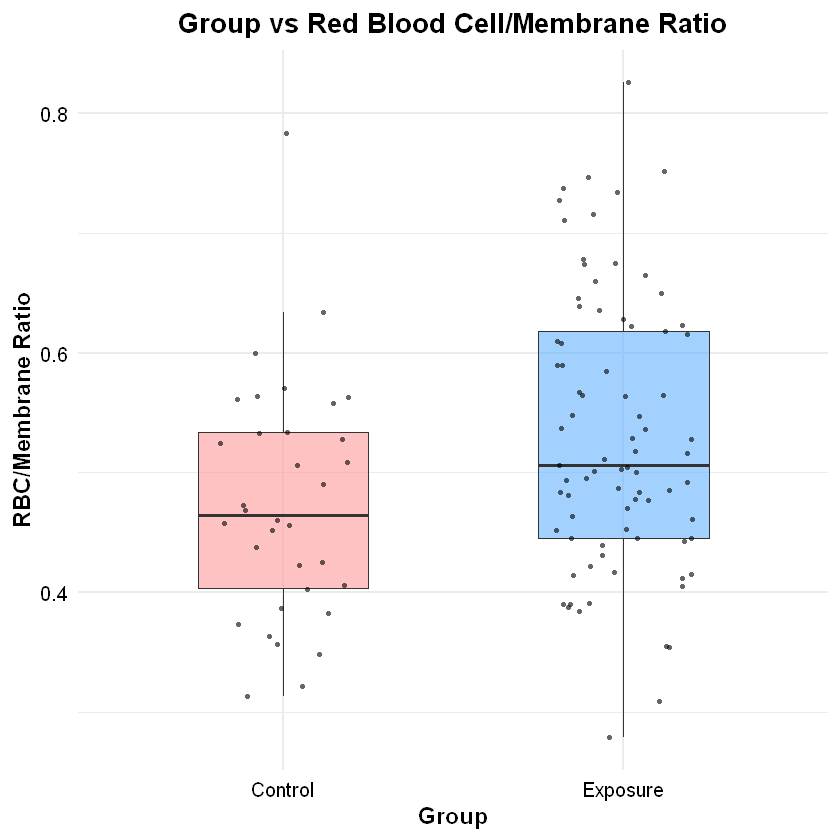

In [47]:
ggplot(data_combined, aes(x = Group, y = rbc_m_ratio)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs Red Blood Cell/Membrane Ratio",
       x = "Group",
       y = "RBC/Membrane Ratio") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none",  
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))

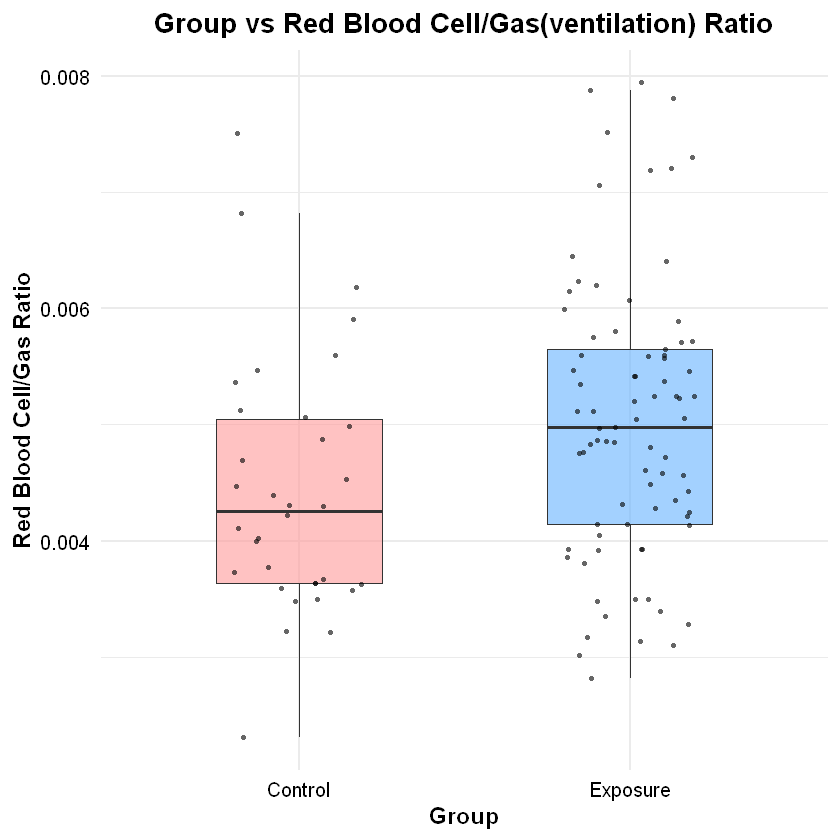

In [48]:
ggplot(data_combined, aes(x = Group, y = rbc_mean)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs Red Blood Cell/Gas(ventilation) Ratio",
       x = "Group",
       y = "Red Blood Cell/Gas Ratio") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none",  
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))

Warning message:
"Removed 20 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 20 rows containing missing values or values outside the scale range (`geom_point()`)."


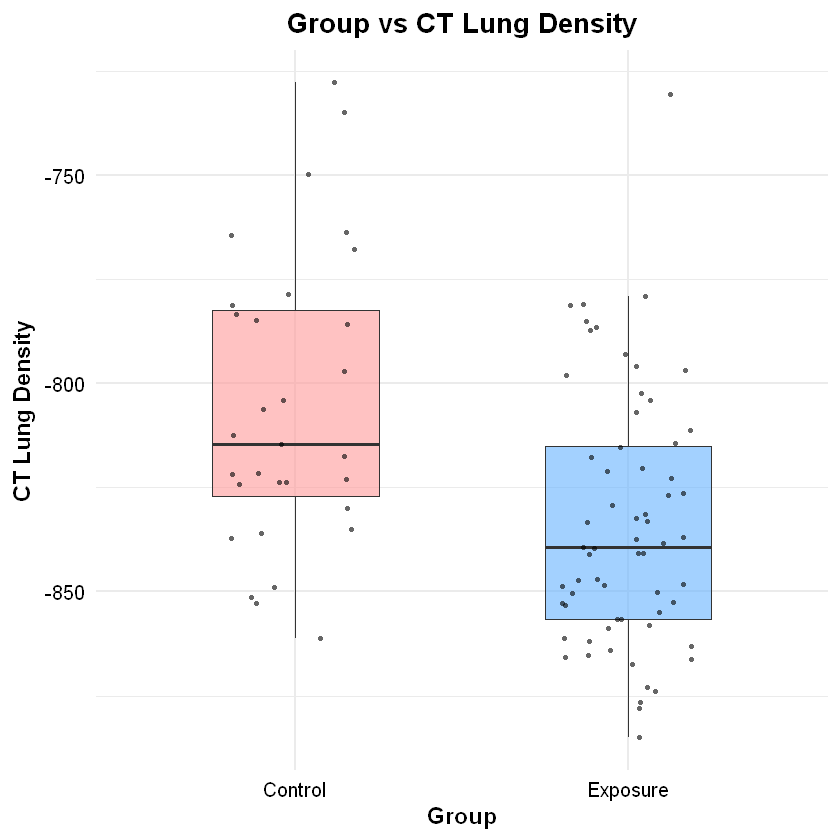

In [55]:
ggplot(data_combined, aes(x = Group, y = mean)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs CT Lung Density",
       x = "Group",
       y = "CT Lung Density") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none",  
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


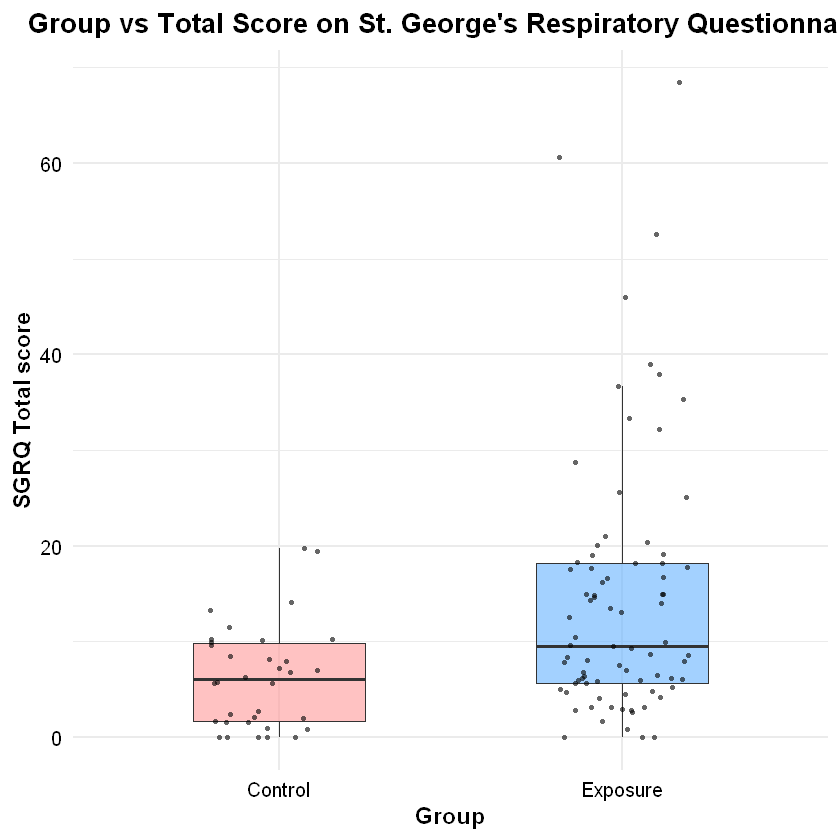

In [53]:
ggplot(data_combined, aes(x = Group, y = SGRQ_Total_score)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs Total Score on St. George's Respiratory Questionnaire",
       x = "Group",
       y = "SGRQ Total score") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none", 
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))

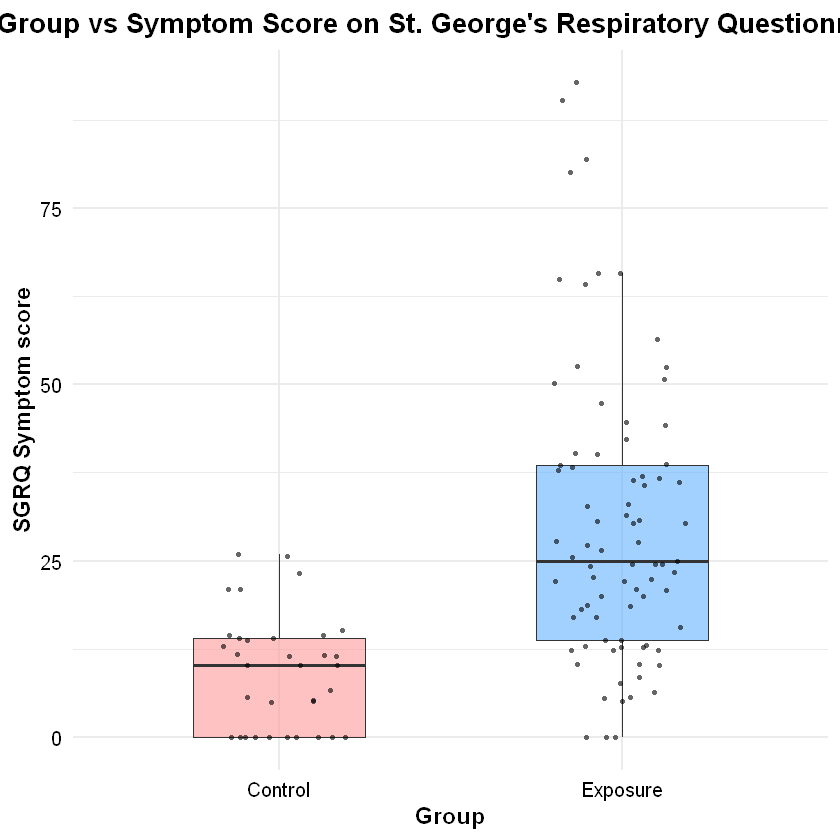

In [57]:
ggplot(data_combined, aes(x = Group, y = SGRQ_Symptoms_score)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs Symptom Score on St. George's Respiratory Questionnaire",
       x = "Group",
       y = "SGRQ Symptom score") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none", 
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


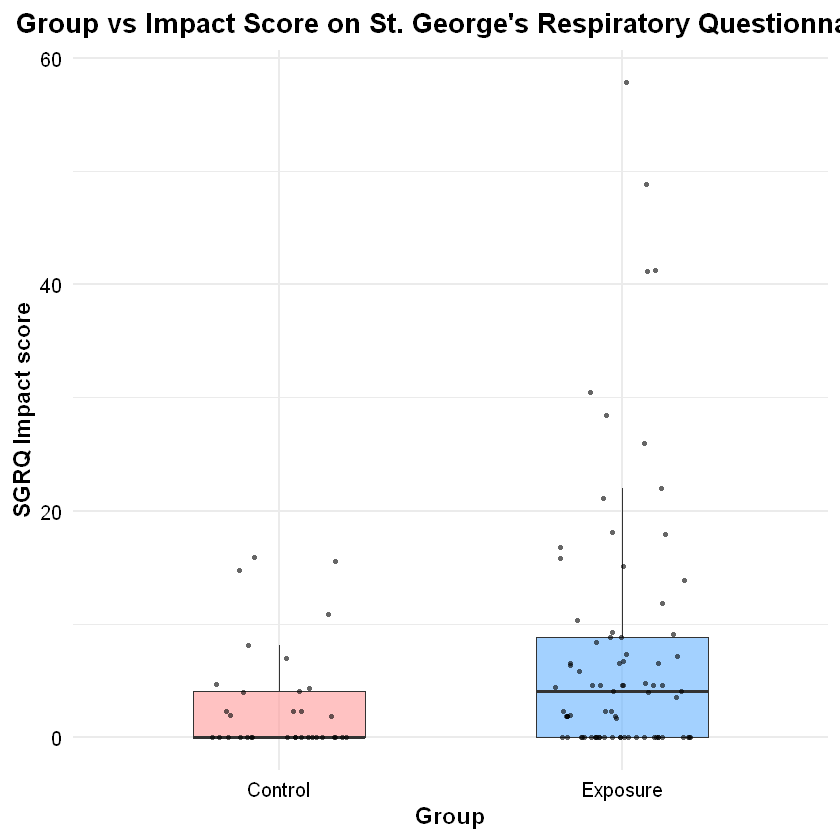

In [59]:
ggplot(data_combined, aes(x = Group, y = SGRQ_Impacts_score)) + 
  geom_boxplot(aes(fill = Group), width = 0.5, outlier.shape = NA, alpha = 0.6) + 
  geom_jitter(width = 0.2, height = 0, shape = 16, size = 1, alpha = 0.6, color = "black") + 
  labs(title = "Group vs Impact Score on St. George's Respiratory Questionnaire",
       x = "Group",
       y = "SGRQ Impact score") + 
  theme_minimal(base_size = 14) + 
  theme(
    legend.position = "none", 
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  ) + 
  scale_fill_manual(values = c("#FF9999", "#66B2FF", "#99FF99", "#FFD700"))